# Exploratory Data Analysis

#### Marco Wong
#### November 11th, 2023

## Table of Contents

[Datasets](#Datasets)

[Data Cleaning](#Data-Cleaning)

[EDA & Visualizations](#EDA-&-Visualizations)

In [1]:
# To check the dataframe encoding type
import chardet

# For general use
import numpy as np
import pandas as pd

# For plotting purposes
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# Used for statistical analysis
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

## Datasets

This project will use the following 4 datasets:

> 1. **Player statistics in the season 2022-2023**
> 2. **Player statistics in the season 2021-2022**
> 3. **Player valuation, externally scraped from the website 'Transfermarkt'**
> 4. **Player names and information, externally scraped from the website 'Transfermarkt'**

The first two datasets contains information about each individual player in the top 5 leagues in each respective season: the first dataset for the season 2022 to 2023 and the second dataset for the season 2021 to 2022. This dataset contains specific characteristics, including player nationality, age, team, competition, and also in game statistics like passes made per 90, shots per game, matches played in the season. 

The third and fourth datasets will provide valuation of individual players for each season. It is important to consider the timeframe. Ideally, I would like the valuations, for the 2022 to 2023 season, to be at the end of that season. This valuation date should be in the summer of 2023. Likewise, the valuation date for the 2021 to 2022 season should be in the summer of 2022.

These two datasets are scraped from Transfermarkt, a third party company, and the valuation is based on their own internal modelling system. This will used as the training data for my model. These two datasets are from a different dataset than the first two.

In order to effectively model the players valuation, each dataset will be properly cleaned, and then appended together when required.

In [2]:
# Checking the encoding type of this dataset due to errors from regular importing
with open("data/2022-2023 Football Player Stats.csv", 'rb') as f:
    result = chardet.detect(f.read())

print(result)

{'encoding': 'Windows-1252', 'confidence': 0.7293054919805775, 'language': ''}


In [3]:
# Importing the data
import_stats2023 = pd.read_csv("data/2022-2023 Football Player Stats.csv", encoding = 'Windows-1252', delimiter = ';')
import_stats2022 = pd.read_csv("data/2021-2022 Football Player Stats.csv", encoding = 'Windows-1252', delimiter = ';')
import_valuation = pd.read_csv("data/player_valuations.csv")
import_players = pd.read_csv("data/players.csv")

In [4]:
# Creating a copy
player_stats2023 = import_stats2023.copy()
player_stats2022 = import_stats2022.copy()
player_valuation = import_valuation.copy()
players = import_players.copy()

## Data Cleaning


### Player Statistics Datasets

#### First, we look at our `player_stats2023` table.

In [5]:
player_stats2023.head(15)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0.00,0.00,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0.00,0.00,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.00,0.00,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.00,0.35,0.80,0.00,0.00,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.00,0.23,2.02,0.00,0.00,0.00,6.51,0.31,0.39,44.4
5,6,Oliver Abildgaard,DEN,MF,Hellas Verona,Serie A,26,1996,1,0,...,0.00,0.00,10.00,0.00,0.00,0.00,10.00,0.00,10.00,0.0
6,7,Matthis Abline,FRA,FWMF,Auxerre,Ligue 1,19,2003,5,2,...,0.48,0.95,0.48,0.00,0.00,0.00,0.48,1.43,1.43,50.0
7,8,Matthis Abline,FRA,FWMF,Rennes,Ligue 1,19,2003,11,0,...,0.83,1.67,0.83,0.83,0.00,0.00,1.67,0.83,3.33,20.0
8,9,Abner,BRA,DF,Betis,La Liga,22,2000,4,3,...,0.00,1.33,2.33,0.00,0.00,0.00,6.00,1.00,2.00,33.3
9,10,Zakaria Aboukhlal,MAR,FWMF,Toulouse,Ligue 1,22,2000,22,17,...,0.72,0.96,0.72,0.00,0.00,0.00,4.43,0.42,1.32,24.1


In [6]:
player_stats2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Columns: 124 entries, Rk to AerWon%
dtypes: float64(112), int64(7), object(5)
memory usage: 2.5+ MB


In [7]:
# Checking our categorical variables
player_stats2023.columns[player_stats2023.dtypes == 'object']

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp'], dtype='object')

In [8]:
# Checking our columns with data type integer to see if we need to convert to categorical variables.
player_stats2023.columns[player_stats2023.dtypes == 'int64']

Index(['Rk', 'Age', 'Born', 'MP', 'Starts', 'Min', 'Goals'], dtype='object')

This dataset has 2689 entries - which means there are 2689 players listed. This sounds intuitively correct as each league has aorund 20 teams, and each team has 25 to 30 players. A rough estimate shows that each league should have 500 (20 x 25) to 600 (20 x 30) players. If we multiple that by 5 (the number of leagues in the dataset), we should 

In [9]:
player_stats2023.columns[:15]

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Goals', 'Shots', 'SoT'],
      dtype='object')

In [10]:
player_stats2023.columns[-5:]

Index(['OG', 'Recov', 'AerWon', 'AerLost', 'AerWon%'], dtype='object')

In [11]:
print(player_stats2023.columns.tolist())

['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP', 'Starts', 'Min', '90s', 'Goals', 'Shots', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'ShoDist', 'ShoFK', 'ShoPK', 'PKatt', 'PasTotCmp', 'PasTotAtt', 'PasTotCmp%', 'PasTotDist', 'PasTotPrgDist', 'PasShoCmp', 'PasShoAtt', 'PasShoCmp%', 'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'PasLonCmp', 'PasLonAtt', 'PasLonCmp%', 'Assists', 'PasAss', 'Pas3rd', 'PPA', 'CrsPA', 'PasProg', 'PasAtt', 'PasLive', 'PasDead', 'PasFK', 'TB', 'Sw', 'PasCrs', 'TI', 'CK', 'CkIn', 'CkOut', 'CkStr', 'PasCmp', 'PasOff', 'PasBlocks', 'SCA', 'ScaPassLive', 'ScaPassDead', 'ScaDrib', 'ScaSh', 'ScaFld', 'ScaDef', 'GCA', 'GcaPassLive', 'GcaPassDead', 'GcaDrib', 'GcaSh', 'GcaFld', 'GcaDef', 'Tkl', 'TklWon', 'TklDef3rd', 'TklMid3rd', 'TklAtt3rd', 'TklDri', 'TklDriAtt', 'TklDri%', 'TklDriPast', 'Blocks', 'BlkSh', 'BlkPass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Touches', 'TouDefPen', 'TouDef3rd', 'TouMid3rd', 'TouAtt3rd', 'TouAttPen', 'TouLive', 'ToAtt', 'ToSuc', 'ToSuc%'

Note that there are 124 columns in this dataset, with 112 as float datatypes, 7 as integers and 5 as objects. The first 8 columns show descriptive information about the player. These are mainly categorical columns.

This dataset has many numeric columns which each attribute to an individual metric. As an example, we can see the last 5 columns are all player statistics, which is shown in the 'per 90' format.

Below is a comprehensive list provided by the dataset creators, explaining the meaning of each column:

- **Rk**: Rank
- **Player**: Player's name
- **Nation**: Player's nation
- **Pos**: Position
- **Squad**: Squad’s name
- **Comp**: League that squad occupies
- **Age**: Player's age
- **Born**: Year of birth
- **MP**: Matches played
- **Starts**: Matches started
- **Min**: Minutes played
- **90s**: Minutes played divided by 90
- **Goals**: Goals scored or allowed
- **Shots**: Shots total (Does not include penalty kicks)
- **SoT**: Shots on target (Does not include penalty kicks)
- **SoT%**: Shots on target percentage (Does not include penalty kicks)
- **G/Sh**: Goals per shot
- **G/SoT**: Goals per shot on target (Does not include penalty kicks)
- **ShoDist**: Average distance, in yards, from goal of all shots taken (Does not include penalty kicks)
- **ShoFK**: Shots from free kicks
- **ShoPK**: Penalty kicks made
- **PKatt**: Penalty kicks attempted
- **PasTotCmp**: Passes completed
- **PasTotAtt**: Passes attempted
- **PasTotCmp%**: Pass completion percentage
- **PasTotDist**: Total distance, in yards, that completed passes have traveled in any direction
- **PasTotPrgDist**: Total distance, in yards, that completed passes have traveled towards the opponent's goal
- **PasShoCmp**: Passes completed (Passes between 5 and 15 yards)
- **PasShoAtt**: Passes attempted (Passes between 5 and 15 yards)
- **PasShoCmp%**: Pass completion percentage (Passes between 5 and 15 yards)
- **PasMedCmp**: Passes completed (Passes between 15 and 30 yards)
- **PasMedAtt**: Passes attempted (Passes between 15 and 30 yards)
- **PasMedCmp%**: Pass completion percentage (Passes between 15 and 30 yards)
- **PasLonCmp**: Passes completed (Passes longer than 30 yards)
- **PasLonAtt**: Passes attempted (Passes longer than 30 yards)
- **PasLonCmp%**: Pass completion percentage (Passes longer than 30 yards)
- **Assists**: Assists
- **PasAss**: Passes that directly lead to a shot (assisted shots)
- **Pas3rd**: Completed passes that enter the 1/3 of the pitch closest to the goal
- **PPA**: Completed passes into the 18-yard box
- **CrsPA**: Completed crosses into the 18-yard box
- **PasProg**: Completed passes that move the ball towards the opponent's goal at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area
- **PasAtt**: Passes attempted
- **PasLive**: Live-ball passes
- **PasDead**: Dead-ball passes
- **PasFK**: Passes attempted from free kicks
- **TB**: Completed pass sent between back defenders into open space
- **Sw**: Passes that travel more than 40 yards of the width of the pitch
- **PasCrs**: Crosses
- **TI**: Throw-Ins taken
- **CK**: Corner kicks
- **CkIn**: Inswinging corner kicks
- **CkOut**: Outswinging corner kicks
- **CkStr**: Straight corner kicks
- **PasCmp**: Passes completed
- **PasOff**: Offsides
- **PasBlocks**: Blocked by the opponent who was standing it the path
- **SCA**: Shot-creating actions
- **ScaPassLive**: Completed live-ball passes that lead to a shot attempt
- **ScaPassDead**: Completed dead-ball passes that lead to a shot attempt
- **ScaDrib**: Successful dribbles that lead to a shot attempt
- **ScaSh**: Shots that lead to another shot attempt
- **ScaFld**: Fouls drawn that lead to a shot attempt
- **ScaDef**: Defensive actions that lead to a shot attempt
- **GCA**: Goal-creating actions
- **GcaPassLive**: Completed live-ball passes that lead to a goal
- **GcaPassDead**: Completed dead-ball passes that lead to a goal
- **GcaDrib**: Successful dribbles that lead to a goal
- **GcaSh**: Shots that lead to another goal-scoring shot
- **GcaFld**: Fouls drawn that lead to a goal
- **GcaDef**: Defensive actions that lead to a goal
- **Tkl**: Number of players tackled
- **TklWon**: Tackles in which the tackler's team won possession of the ball
- **TklDef3rd**: Tackles in defensive 1/3
- **TklMid3rd**: Tackles in middle 1/3
- **TklAtt3rd**: Tackles in attacking 1/3
- **TklDri**: Number of dribblers tackled
- **TklDriAtt**: Number of times dribbled past plus number of tackles
- **TklDri%**: Percentage of dribblers tackled
- **TklDriPast**: Number of times dribbled past by an opposing player
- **Blocks**: Number of times blocking the ball by standing in its path
- **BlkSh**: Number of times blocking a shot by standing in its path
- **BlkPass**: Number of times blocking a pass by standing in its path
- **Int**: Interceptions
- **Tkl+Int**: Number of players tackled plus number of interceptions
- **Clr**: Clearances
- **Err**: Mistakes leading to an opponent's shot
- **Touches**: Number of times a player touched the ball. Note: Receiving a pass, then dribbling, then sending a pass counts as one touch
- **TouDefPen**: Touches in defensive penalty area
- **TouDef3rd**: Touches in defensive 1/3
- **TouMid3rd**: Touches in middle 1/3
- **TouAtt3rd**: Touches in attacking 1/3
- **TouAttPen**: Touches in attacking penalty area
- **TouLive**: Live-ball touches. Does not include corner kicks, free kicks, throw-ins, kick-offs, goal kicks or penalty kicks.
- **ToAtt**: Number of attempts to take on defenders while dribbling
- **ToSuc**: Number of defenders taken on successfully, by dribbling past them
- **ToSuc%**: Percentage of take-ons Completed Successfully
- **ToTkl**: Number of times tackled by a defender during a take-on attempt
- **ToTkl%**: Percentage of time tackled by a defender during a take-on attempt
- **Carries**: Number of times the player controlled the ball with their feet
- **CarTotDist**: Total distance, in yards, a player moved the ball while controlling it with their feet, in any direction
- **CarPrgDist**: Total distance, in yards, a player moved the ball while controlling it with their feet towards the opponent's goal
- **CarProg**: Carries that move the ball towards the opponent's goal at least 5 yards, or any carry into the penalty area
- **Car3rd**: Carries that enter the 1/3 of the pitch closest to the goal
- **CPA**: Carries into the 18-yard box
- **CarMis**: Number of times a player failed when attempting to gain control of a ball
- **CarDis**: Number of times a player loses control of the ball after being tackled by an opposing player
- **Rec**: Number of times a player successfully received a pass
- **RecProg**: Completed passes that move the ball towards the opponent's goal at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area
- **CrdY**: Yellow cards
- **CrdR**: Red cards
- **2CrdY**: Second yellow card
- **Fls**: Fouls committed
- **Fld**: Fouls drawn
- **Off**: Offsides
- **Crs**: Crosses
- **TklW**: Tackles in which the tackler's team won possession of the ball
- **PKwon**: Penalty kicks won
- **PKcon**: Penalty kicks conceded
- **OG**: Own goals
- **Recov**: Number of loose balls recovered
- **AerWon**: Aerials won
- **AerLost**: Aerials lost
- **AerWon%**: Percentage of aerials won


#### Duplicate columns and rows

First, let's check for duplicate columns to make sure that each colum contains unique information.

In [12]:
# Transversing the data will show information about the columns instead
player_stats2023.T[player_stats2023.T.duplicated(keep = False)] 

,0,1,2,3,4,5,6,7,8,9,...,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688
PasTotCmp,23.2,38.5,40.0,59.5,37.9,20.0,7.14,5.83,39.0,17.6,...,59.0,36.8,27.5,45.8,45.0,42.5,20.0,38.3,19.7,23.5
PasTotAtt,31.0,47.2,49.5,64.9,43.4,30.0,10.0,12.5,54.3,25.3,...,67.0,43.0,45.0,52.7,53.4,47.5,40.0,48.4,36.9,30.9
PasAtt,31.0,47.2,49.5,64.9,43.4,30.0,10.0,12.5,54.3,25.3,...,67.0,43.0,45.0,52.7,53.4,47.5,40.0,48.4,36.9,30.9
PasCrs,2.54,0.18,1.05,0.35,0.23,0.0,0.95,1.67,1.33,0.96,...,4.0,0.0,0.0,0.21,0.11,2.5,0.0,2.51,0.0,1.56
PasCmp,23.2,38.5,40.0,59.5,37.9,20.0,7.14,5.83,39.0,17.6,...,59.0,36.8,27.5,45.8,45.0,42.5,20.0,38.3,19.7,23.5
TklWon,0.51,1.59,1.4,0.8,2.02,10.0,0.48,0.83,2.33,0.72,...,2.0,0.14,0.0,0.86,1.07,0.0,0.0,0.7,0.13,0.88
Crs,2.54,0.18,1.05,0.35,0.23,0.0,0.95,1.67,1.33,0.96,...,4.0,0.0,0.0,0.21,0.11,2.5,0.0,2.51,0.0,1.56
TklW,0.51,1.59,1.4,0.8,2.02,10.0,0.48,0.83,2.33,0.72,...,2.0,0.14,0.0,0.86,1.07,0.0,0.0,0.7,0.13,0.88


We can see 4 of the columns are duplicates of another column, even though the column name is unique, the information contained is identical in these columns.

Thus, we will need to remove these 4 columns later (one of each pair). It is not important which one we choose, but we must make sure we check the same for the next dataset and drop the same rows.

Next, we check for duplicate rows.

In [13]:
player_stats2023.duplicated().any()

False

There are no duplicated rows in this dataset.

#### Null values

Next, we check for null values in the dataset.

In [14]:
# To check which column has null values
player_stats2023.columns[player_stats2023.isna().any()]

Index(['Nation'], dtype='object')

In [15]:
player_stats2023[player_stats2023['Nation'].isna()]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
1875,1876,David Ozoh,NaN,FW,Crystal Palace,Premier League,17,2005,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


A quick google search will show that David Ozoh is English, we can fill this information as English.

In [16]:
player_stats2023.loc[player_stats2023['Player'] =='David Ozoh','Nation'] = 'English'

In [17]:
# Sanity check
player_stats2023.loc[player_stats2023['Player'] =='David Ozoh']

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
1875,1876,David Ozoh,English,FW,Crystal Palace,Premier League,17,2005,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Double check to make sure there are no more null values
player_stats2023.columns[player_stats2023.isna().any()]

Index([], dtype='object')

There are still a few things to look out for as we clean the rest of the datasets:
- Since we will be joining the valuation datasets using the name, we must make sure that the names are properly cleaned. Some names with accents may prove problematic.
- There are a different amount of columns in this dataset and the next. I will have to make a choice on how to deal with the additional/ different rows for my model.
- Many of the columns are in the format 'per 90', whilst some other columns have absolute numbers but convey the same information. It may be wise to convert all the columns to the same base and remove any which convey the same information.

### Player_stats2022 table

In [19]:
player_stats2022.head(15)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.03,1.41,1.16,0.00,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.00,0.06,1.39,0.00,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.00,0.36,1.24,0.00,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.03,0.79,2.23,0.00,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,0.00,2.00,0.00,0.00,0.00,0.00,4.00,2.00,0.00,100.0
5,6,Dickson Abiama,NGA,FW,Greuther Fürth,Bundesliga,23.0,1998,24,5,...,1.85,0.25,0.86,0.00,0.00,0.00,4.81,2.72,4.94,35.5
6,7,Matthis Abline,FRA,FW,Rennes,Ligue 1,19.0,2003,7,1,...,0.00,0.91,0.00,0.00,0.00,0.00,6.36,0.00,1.82,0.0
7,8,Tammy Abraham,ENG,FW,Roma,Serie A,24.0,1997,37,36,...,0.50,0.70,0.64,0.03,0.03,0.00,3.67,2.39,2.89,45.3
8,9,Luis Abram,PER,DF,Granada,La Liga,26.0,1996,8,6,...,0.00,0.00,0.97,0.00,0.00,0.16,4.03,1.94,2.42,44.4
9,10,Francesco Acerbi,ITA,DF,Lazio,Serie A,34.0,1988,30,29,...,0.14,0.04,0.43,0.04,0.00,0.00,10.70,2.84,1.60,64.0


In [20]:
player_stats2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Columns: 143 entries, Rk to AerWon%
dtypes: float64(133), int64(5), object(5)
memory usage: 3.2+ MB


This dataset has 2921 entries, slightly more than the 2023 dataset. However, note that there are 143 columns in this dataset as opposed to 124 columns in the first dataset.

#### Duplicate values

Let's take a look at the columns. First, we check for any duplicates.

In [21]:
player_stats2022.T[player_stats2022.T.duplicated(keep = False)]

,0,1,2,3,4,5,6,7,8,9,...,2911,2912,2913,2914,2915,2916,2917,2918,2919,2920
PasTotCmp,34.0,38.7,55.9,40.7,4.0,11.1,7.27,14.6,31.3,64.3,...,20.3,26.7,36.6,23.3,50.2,43.2,28.6,43.9,17.7,24.5
PasTotAtt,45.0,47.0,61.0,49.8,12.0,17.2,9.09,20.2,35.5,71.1,...,31.0,28.9,41.1,33.3,56.6,50.4,35.7,51.7,28.3,30.1
PasAtt,45.0,47.0,61.0,49.8,12.0,17.2,9.09,20.2,35.5,71.1,...,31.0,28.9,41.1,33.3,56.6,50.4,35.7,51.7,28.3,30.1
PasCrs,1.41,0.06,0.36,0.79,2.0,0.25,0.91,0.7,0.0,0.04,...,3.18,0.0,0.09,0.0,0.22,0.1,0.74,0.84,0.29,0.0
PasCmp,34.0,38.7,55.9,40.7,4.0,11.1,7.27,14.6,31.3,64.3,...,20.3,26.7,36.6,23.3,50.2,43.2,28.6,43.9,17.7,24.5
TklWon,1.16,1.39,1.24,2.23,0.0,0.86,0.0,0.64,0.97,0.43,...,0.83,0.0,0.22,0.0,0.82,1.08,1.91,0.81,0.17,0.93
Crs,1.41,0.06,0.36,0.79,2.0,0.25,0.91,0.7,0.0,0.04,...,3.18,0.0,0.09,0.0,0.22,0.1,0.74,0.84,0.29,0.0
TklW,1.16,1.39,1.24,2.23,0.0,0.86,0.0,0.64,0.97,0.43,...,0.83,0.0,0.22,0.0,0.82,1.08,1.91,0.81,0.17,0.93


The duplicate columns are indentical to those in the first dataset. We can choose to drop one of the columns of each pair in both of the datasets. I will drop PasTotCmp, PasTotAtt, Crs, TklW, due to their relative position in the columns (these dropped columns have more complex names or are awkwardly positioned within the columns). 

In [22]:
player_stats2023.drop(columns = ['PasTotCmp','PasTotAtt', 'Crs','TklW'], inplace = True)

In [23]:
player_stats2022.drop(columns = ['PasTotCmp','PasTotAtt', 'Crs','TklW'], inplace = True)

In [24]:
# Sanity check
player_stats2023.T[player_stats2023.T.duplicated(keep = False)]

,0,1,2,3,4,5,6,7,8,9,...,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688


In [25]:
# Sanity check
player_stats2022.T[player_stats2022.T.duplicated(keep = False)]

,0,1,2,3,4,5,6,7,8,9,...,2911,2912,2913,2914,2915,2916,2917,2918,2919,2920


Next, let's investigate the unique columns that in this dataset as opposed to the first dataset.

We need to check both sides: even though the 2023 dataset has less columns, there may be columns in the 2023 dataset that is not available in the 2022 dataset.

In [26]:
# We use the set function to find unique columns in each dataset
Unique2023 = set(player_stats2023.columns) - set(player_stats2022.columns)
print(f'These columns are unique to 2023 Dataset: {Unique2023}')

These columns are unique to 2023 Dataset: {'ToTkl%', 'ToSuc%', 'ToSuc', 'ToTkl', 'ToAtt'}


In [27]:
Unique2022 = set(player_stats2022.columns) - set(player_stats2023.columns)
print(f'These columns are unique to 2022 Dataset: {Unique2022}')

These columns are unique to 2022 Dataset: {'DriMegs', 'DriSucc%', 'PasHigh', 'Press', 'BlkShSv', 'PasPress', 'RecTarg', 'PaswOther', 'PresSucc', 'DriAtt', 'PaswLeft', 'PresAtt3rd', 'DriSucc', 'PasLow', 'PresDef3rd', 'PasInt', 'Press%', 'PaswHead', 'DriPast', 'PresMid3rd', 'PasGround', 'Rec%', 'PaswRight', 'PasOut'}


In [28]:
player_stats2022[list(Unique2022)]

,DriMegs,DriSucc%,PasHigh,Press,BlkShSv,PasPress,RecTarg,PaswOther,PresSucc,DriAtt,...,PresDef3rd,PasInt,Press%,PaswHead,DriPast,PresMid3rd,PasGround,Rec%,PaswRight,PasOut
0,0.19,42.3,8.94,13.6,0.03,5.41,36.0,0.06,3.53,2.44,...,7.97,1.63,26.0,0.91,1.09,4.38,26.50,89.9,29.00,0.88
1,0.03,72.7,7.95,13.6,0.06,5.68,37.5,0.12,4.89,0.66,...,7.61,1.24,35.9,1.48,0.48,5.14,35.30,96.9,12.10,0.97
2,0.07,64.3,3.72,23.4,0.00,8.03,58.6,0.29,6.53,1.53,...,7.19,1.24,27.9,1.90,1.09,12.30,52.60,92.5,53.10,0.58
3,0.09,64.6,6.65,28.0,0.00,9.48,46.3,0.15,7.90,1.98,...,9.27,1.83,28.2,0.73,1.34,15.30,37.60,93.0,43.90,0.55
4,0.00,0.0,2.00,28.0,0.00,6.00,24.0,0.00,2.00,0.00,...,0.00,4.00,7.1,0.00,0.00,22.00,10.00,66.7,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,0.00,62.5,7.57,13.7,0.00,9.06,41.9,0.28,4.48,0.56,...,4.58,1.35,32.7,1.81,0.42,7.50,37.80,96.9,35.50,0.83
2917,0.04,70.0,3.79,18.6,0.04,8.63,38.9,0.16,5.47,1.56,...,6.52,1.41,29.4,0.70,1.17,7.58,28.20,86.5,28.10,0.63
2918,0.06,52.4,5.89,18.6,0.00,7.99,51.4,0.42,4.98,1.36,...,3.46,1.75,26.8,1.10,0.74,8.48,40.30,87.5,4.17,0.49
2919,0.04,64.7,8.67,10.3,0.00,14.40,47.3,2.07,2.45,0.71,...,0.29,1.29,23.8,5.06,0.50,4.15,9.29,65.0,8.96,0.41


These variables do look interesting. For now, we can update our data dictionary with these unique columns:
- **PresMid3rd**: Number of times applying pressure to opposing player who is receiving, carrying or releasing the ball, in the middle 1/3
- **BlkShSv**: Number of times blocking a shot that was on target, by standing in its path
- **Rec%**: Percentage of time a player successfully received a pass
- **PresSucc**: Number of times the squad gained possession within five seconds of applying pressure
- **DriPast**: Number of players dribbled past
- **PresAtt3rd**: Number of times applying pressure to opposing player who is receiving, carrying or releasing the ball, in the attacking 1/3
- **PaswOther**: Passes attempted using body parts other than the player's head or feet
- **DriMegs**: Number of times a player dribbled the ball through an opposing player's legs
- **PasLow**: Passes that leave the ground but stay below shoulder-level
- **DriSucc**: Dribbles completed successfully
- **DriSucc%**: Percentage of dribbles completed successfully
- **DriAtt**: Dribbles attempted
- **RecTarg**: Number of times a player was the target of an attempted pass
- **PasGround**: Ground passes
- **PaswRight**: Passes attempted using right foot
- **PasHigh**: Passes that are above shoulder-level at the peak height
- **PasInt**: Intercepted passes
- **PasOut**: Passes that went out of bounds
- **PaswLeft**: Passes attempted using left foot
- **PaswHead**: Passes attempted using head
- **Press**: Number of times applying pressure to an opposing player
- **PresDef3rd**: Number of times applying pressure to an opposing player, in the defensive 1/3
- **PasPress**: Passes made while under pressure from an opponent
- **Press%**: Percentage of time the squad gained possession within five seconds of applying pressure

We will decide what to do with these columns later. My initial thoughts are to drop the columns, as they do not exist in the first dataset. Likewise, I will likely drop the unique columns in the first dataset.

#### Null values

Next, we check for null values.

In [29]:
player_stats2022[player_stats2022.isna().any(axis = 1)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
1531,1532,Javier Llabrés,NaN,FWMF,Mallorca,La Liga,NaN,0,5,1,...,0.0,0.67,0.67,0.0,0.0,0.0,5.33,0.67,2.0,25.0


In [30]:
# Replace the values with information obtained from google.
player_stats2022.loc[1531,'Nation'] = 'Spain'
player_stats2022.loc[1531, 'Age'] = 20.0

In [31]:
# Sanity check
player_stats2022[player_stats2022.isna().any(axis = 1)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%


### Players and Player Valuation Datasets
Next, we investigate the `players` and `players_valuation` datasets

In [32]:
players.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
0,598,Timo,Hildebrand,Timo Hildebrand,2014,24,timo-hildebrand,Germany,Worms,Germany,...,NaN,NaN,NaN,10000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/timo-hildebran...,L1,Eintracht Frankfurt
1,670,Martin,Petrov,Martin Petrov,2012,714,martin-petrov,Bulgaria,Vratsa,Bulgaria,...,NaN,NaN,NaN,12000000.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-petrov/...,ES1,RCD Espanyol Barcelona
2,1323,Martin,Amedick,Martin Amedick,2012,24,martin-amedick,Germany,Paderborn,Germany,...,NaN,NaN,NaN,2750000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-amedick...,L1,Eintracht Frankfurt
3,3195,Jermaine,Pennant,Jermaine Pennant,2013,512,jermaine-pennant,England,Nottingham,England,...,right,173.0,NaN,10500000.0,NaN,Andrew Sky,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jermaine-penna...,GB1,Stoke City
4,3259,Damien,Duff,Damien Duff,2013,931,damien-duff,Ireland,Ballyboden,Ireland,...,left,177.0,NaN,17000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/damien-duff/pr...,GB1,Fulham FC


For the `players` dataset, we need to make sure the `player_id`, `first_name` and `last_name` are properly formatted so we can append it to our our tables. We can quickly take a look at the other columns to see if there is any useful information.

In [33]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30302 entries, 0 to 30301
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             30302 non-null  int64  
 1   first_name                            28337 non-null  object 
 2   last_name                             30302 non-null  object 
 3   name                                  30302 non-null  object 
 4   last_season                           30302 non-null  int64  
 5   current_club_id                       30302 non-null  int64  
 6   player_code                           30302 non-null  object 
 7   country_of_birth                      27613 non-null  object 
 8   city_of_birth                         28099 non-null  object 
 9   country_of_citizenship                29759 non-null  object 
 10  date_of_birth                         30255 non-null  object 
 11  sub_position   

The height column can be useful, as it is not present in our player statistics datasets. My intuition is that height can play a big role in player valuation, especially for goalkeepers and defenders. We are not using the market value from this table as it is not time specific. The next dataset has valuations at different time markers.

Additionally, there are 30302 rows as the time spans from over 20 years ago. However, we only need data for players in the last two years. It is also more likely player data from older times are less complete, having more null values. I will filter the dataset where the `last_season` is greater than 2020.

In [34]:
# We can check duplicates next.
players.duplicated().any()

False

#### Null Values

Next, we can take a look at null values. Since we only need the columns - player_id, first_name, last_name and height - we can check for null values only in these columns.

In [35]:
# Extract the relevant columns out of the dataset
players = players[['player_id','first_name','last_name','height_in_cm']]

In [36]:
players.isna().sum()

player_id          0
first_name      1965
last_name          0
height_in_cm    2098
dtype: int64

It is likely that the null heights are for less known players. Since this dataset contains many more players compared to the player statistics dataset, it is likely these unknown heights are for players in lesser known competitions (i.e. not in the top 5 competitions). 

#### Checking names
Since we will need to append the first and last name to match the player stats datasets, the absense of a first name is not important. Many players in foreign countries, notably Spain and Brazil, do not have a public/ registered first name so it is unlikely because of data quality issues.

In [37]:
# Check several names
players[players.isna().any(axis = 1)].sample(15)

,player_id,first_name,last_name,height_in_cm
16607,44172,NaN,Vinicius,186.0
29633,984959,Faissal,El Hajoui,NaN
1548,13872,NaN,Zé Castro,183.0
2,1323,Martin,Amedick,NaN
2325,158427,NaN,Nildo Petrolina,175.0
20904,251452,Tugay,Kaya,NaN
17171,253783,Jesse,Renken,NaN
20307,44358,NaN,Leonardo,188.0
21674,973825,Alessio,Sternon,NaN
29883,351898,NaN,Leandrinho,174.0


In [38]:
# Check for compatibility between two datasets. Check for players dataset
players[players['last_name'] == 'Alex Sandro']

,player_id,first_name,last_name,height_in_cm
7419,79960,NaN,Alex Sandro,181.0


In [39]:
# Check for player_stats2023 dataset
player_stats2023[player_stats2023['Player'] == 'Alex Sandro']

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
2197,2198,Alex Sandro,BRA,DF,Juventus,Serie A,32,1991,17,13,...,1.5,1.26,0.0,0.08,0.0,0.0,6.61,1.97,0.87,69.4


We check the names to see how accents are displayed

In [40]:
players[players['first_name'] == 'André']

,player_id,first_name,last_name,height_in_cm
192,45403,André,Ayew,175.0
506,153538,André,Bjerregaard,188.0
582,186357,André,Luiz,167.0
583,188689,André,Dias,178.0
1178,500638,André,Cardoso,179.0
...,...,...,...,...
27465,14263,André,Vilas Boas,185.0
27654,56510,André,Fomitschow,180.0
28235,135057,André,Carrillo,180.0
28392,198008,André,Silva,185.0


In [41]:
# Test to see if accented names properly search in player stats tables
player_stats2023[player_stats2023['Player'] == 'André Ayew']

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
149,150,André Ayew,GHA,FW,Nott'ham Forest,Premier League,33,1989,2,0,...,0.0,3.33,0.0,0.0,0.0,0.0,0.0,3.33,6.67,33.3


The name accents seems similar to the `player_stats` datasets. The tables should join well.

### Player_valuation dataset

Next, we look at the `player_valuation` dataset. 

In [42]:
player_valuation.head()

,player_id,last_season,datetime,date,dateweek,market_value_in_eur,n,current_club_id,player_club_domestic_competition_id
0,3132,2013,2003-12-09 00:00:00,2003-12-09,2003-12-08,400000,1,126,TR1
1,6893,2012,2003-12-15 00:00:00,2003-12-15,2003-12-15,900000,1,984,GB1
2,10,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,7000000,1,398,IT1
3,26,2017,2004-10-04 00:00:00,2004-10-04,2004-10-04,1500000,1,16,L1
4,65,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,8000000,1,1091,GR1


In [43]:
player_valuation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440663 entries, 0 to 440662
Data columns (total 9 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   player_id                            440663 non-null  int64 
 1   last_season                          440663 non-null  int64 
 2   datetime                             440663 non-null  object
 3   date                                 440663 non-null  object
 4   dateweek                             440663 non-null  object
 5   market_value_in_eur                  440663 non-null  int64 
 6   n                                    440663 non-null  int64 
 7   current_club_id                      440663 non-null  int64 
 8   player_club_domestic_competition_id  440663 non-null  object
dtypes: int64(5), object(4)
memory usage: 30.3+ MB


Note that all the dates columns are in 'object' datatype. From this dataset, we need to find valuations for players in each year, 2022 and 2023. Thus, we can convert the `date` column to datetime.

In [44]:
player_valuation['date'] = pd.to_datetime(player_valuation['date'])

In [45]:
#Sanity check
player_valuation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440663 entries, 0 to 440662
Data columns (total 9 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   player_id                            440663 non-null  int64         
 1   last_season                          440663 non-null  int64         
 2   datetime                             440663 non-null  object        
 3   date                                 440663 non-null  datetime64[ns]
 4   dateweek                             440663 non-null  object        
 5   market_value_in_eur                  440663 non-null  int64         
 6   n                                    440663 non-null  int64         
 7   current_club_id                      440663 non-null  int64         
 8   player_club_domestic_competition_id  440663 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 30.3+ MB


Next, we can filter this table down. We only need the columns: `player_id`, `date` and `market_value_in_eur`.

In [46]:
player_valuation = player_valuation[['player_id','date','market_value_in_eur']]

In [47]:
# Double check
player_valuation.head()

,player_id,date,market_value_in_eur
0,3132,2003-12-09,400000
1,6893,2003-12-15,900000
2,10,2004-10-04,7000000
3,26,2004-10-04,1500000
4,65,2004-10-04,8000000


#### Merging the datasets
First, we can merge the `players` and `players_valuation` dataset and do a inner join by the `player_id`. Since these two datasets are from the same source, there should be no issues with the join.

Our next step will be to join the new merged table with each of our datasets. However, there are still multiple valuations for the same player within the required time window (summer of the respective year). The method I will employ is as follows:
- Two tables are created - one for valuations for the summer of 2022, one for valuations for the summer of 2023. For multiple valuations in these tables, we proceed to average the valuations within the time window, from May to September. 
- Afterwards, we merge the data with each of the player_stats tables. Ideally, each player will have a valuation.

In [48]:
# Setting the player valuation for the 2022 season to be between May and September
player_valuation_2022 = player_valuation[
    (player_valuation['date'].dt.year.between (2022,2022)) & 
    (player_valuation['date'].dt.month.between(5,9))]

In [49]:
player_valuation_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19751 entries, 389273 to 409023
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   player_id            19751 non-null  int64         
 1   date                 19751 non-null  datetime64[ns]
 2   market_value_in_eur  19751 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 617.2 KB


In [50]:
# Creating the filtered table for 2023 player valuation
player_valuation_2023 = player_valuation[
    (player_valuation['date'].dt.year.between (2023,2023)) & 
    (player_valuation['date'].dt.month.between(5,9))]

In [51]:
player_valuation_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9537 entries, 431125 to 440661
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   player_id            9537 non-null   int64         
 1   date                 9537 non-null   datetime64[ns]
 2   market_value_in_eur  9537 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 298.0 KB


First, we merge the `player_valuation 2023` with `players`.

In [52]:
merged_2023 = pd.merge(players,player_valuation_2023, on = 'player_id', how = 'inner')

In [53]:
merged_2023

,player_id,first_name,last_name,height_in_cm,date,market_value_in_eur
0,18922,Karim,Benzema,185.0,2023-06-13,25000000
1,22860,Jesper,Hansen,188.0,2023-06-26,200000
2,30321,Óscar,Trejo,180.0,2023-06-13,3000000
3,33925,Jessy,Moulin,184.0,2023-06-27,200000
4,35099,Steven,Fletcher,185.0,2023-06-26,200000
...,...,...,...,...,...,...
9525,284732,Ramy,Bensebaini,187.0,2023-06-22,20000000
9526,371851,Jaka,Bijol,190.0,2023-06-15,10000000
9527,586756,Festy,Ebosele,180.0,2023-06-15,3500000
9528,704692,Nicolò,Cocetta,NaN,2023-06-13,75000


In [102]:
merged_2023[(merged_2023['first_name'].duplicated(keep = False)) & (merged_2023['last_name'].duplicated(keep = False)) & (merged_2023['first_name'] == 'Aaron')]

,player_id,first_name,last_name,height_in_cm,mean_market_value_in_eur
1009,50057,Aaron,Ramsey,178.0,2500000.0
1142,92571,Aaron,Cresswell,NaN,1200000.0
5557,646658,Aaron,Ramsey,181.0,5000000.0


In [54]:
# Check the missing rows, resulting from the inner join
missing_ids = player_valuation_2023[~player_valuation_2023['player_id'].isin(players['player_id'])]
print(missing_ids)

        player_id       date  market_value_in_eur
435833     395485 2023-06-19               400000
436975     730879 2023-06-21               150000
440299     876646 2023-07-05                50000
440417     881687 2023-08-01                50000
440467    1069459 2023-09-11               100000
440468    1078326 2023-09-11               100000
440473     866609 2023-09-12               100000


This shouldn't be a big problem as it is only 7 entries. There might be some error in the data source, where the `players` and `player_valuation` have mismatched player_id's.

Next, we proceed to merge the 2022 dataset with players.

In [55]:
merged_2022 = pd.merge(players,player_valuation_2022, on = 'player_id', how = 'inner')

In [56]:
merged_2022.head()

,player_id,first_name,last_name,height_in_cm,date,market_value_in_eur
0,4042,Brad,Jones,194.0,2022-05-06,200000
1,4133,Richie,Ryan,178.0,2022-06-10,100000
2,8187,Juanmi,Callejón,180.0,2022-06-29,250000
3,14221,Aaron,Lennon,165.0,2022-06-15,1000000
4,17592,Pawel,Kieszek,187.0,2022-06-14,75000


In [57]:
merged_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19748 entries, 0 to 19747
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   player_id            19748 non-null  int64         
 1   first_name           18541 non-null  object        
 2   last_name            19748 non-null  object        
 3   height_in_cm         19232 non-null  float64       
 4   date                 19748 non-null  datetime64[ns]
 5   market_value_in_eur  19748 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 925.8+ KB


In [58]:
# Check the missing rows, resulting from the inner join
missing_ids = player_valuation_2022[~player_valuation_2022['player_id'].isin(players['player_id'])]
print(missing_ids)

        player_id       date  market_value_in_eur
390384     730879 2022-05-18                75000
391458     395485 2022-05-30               500000
402988     213895 2022-06-27               100000


Only 3 rows of mismatched player id's. Should not be an issue.

#### Multiple Valuations per players

First, I check if there are multiple valuations for the same player within the time window.

In [59]:
# Check number of rows
merged_2022.shape

(19748, 6)

In [60]:
# Check how many players have repeated valuations within the time window
merged_2022.groupby(['player_id']).size().value_counts()

1    15847
2     1946
3        3
Name: count, dtype: int64

As shown in the output, 1946 + 3 players have multiple valuations within this merged dataset. Thus, I will use the mean for of the valuations to set as the final valuation.

In [61]:
# To find the rows with 3 valuations in the dataset
# Grouping by 'player_id' and calculating the size of each group
group_sizes = merged_2022.groupby('player_id').size()

# Finding 'player_id' groups with a size of 3
player_id_with_size_3 = group_sizes[group_sizes == 3].index

# Filtering the DataFrame to get rows where 'player_id' has a size of 3
rows_with_size_3 = merged_2022[merged_2022['player_id'].isin(player_id_with_size_3)]

print(rows_with_size_3)


       player_id first_name  last_name  height_in_cm       date  \
11564     625654      Julen     Lobete         177.0 2022-06-03   
11565     625654      Julen     Lobete         177.0 2022-06-29   
11566     625654      Julen     Lobete         177.0 2022-09-14   
18835     525299     Miguel  Gutiérrez         180.0 2022-06-03   
18836     525299     Miguel  Gutiérrez         180.0 2022-06-29   
18837     525299     Miguel  Gutiérrez         180.0 2022-09-23   
18941     636688  Alejandro      Balde         175.0 2022-06-03   
18942     636688  Alejandro      Balde         175.0 2022-06-29   
18943     636688  Alejandro      Balde         175.0 2022-09-23   

       market_value_in_eur  
11564              5000000  
11565              3000000  
11566              2500000  
18835              6000000  
18836              6000000  
18837              8000000  
18941              4000000  
18942              4000000  
18943              8000000  


In [62]:
# Checking to see if the new column is calculating properly
merged_2022[merged_2022['player_id'] == 636688]

,player_id,first_name,last_name,height_in_cm,date,market_value_in_eur
18941,636688,Alejandro,Balde,175.0,2022-06-03,4000000
18942,636688,Alejandro,Balde,175.0,2022-06-29,4000000
18943,636688,Alejandro,Balde,175.0,2022-09-23,8000000


In [63]:
merged_2022['player_id'].nunique()

17796

As there are multiple listings, I will set the market valuation as the mean of the valuations.

I will first add a column called `mean_market_value_per_player`, then proceed to drop the `market_value_in_eur`. Afterwards, I will drop all duplicates.

In [64]:
merged_2022['mean_market_value_per_player'] = merged_2022.groupby('player_id')['market_value_in_eur'].transform('mean')

In [65]:
merged_2022 = merged_2022.drop(columns=['market_value_in_eur','date']).drop_duplicates(subset = ['player_id']).reset_index()

In [66]:
# Double check earlier example
merged_2022[merged_2022['player_id'] == 636688]

,index,player_id,first_name,last_name,height_in_cm,mean_market_value_per_player
17079,18941,636688,Alejandro,Balde,175.0,5.333333e+06


In [67]:
# Check the null values in the dataset
merged_2022.isna().sum()

index                              0
player_id                          0
first_name                      1101
last_name                          0
height_in_cm                     494
mean_market_value_per_player       0
dtype: int64

Even though there are null values in the height, this may not be a problem as not all players in this dataset are used. I will investigate further upon merging the datasets. 

As for null values in `first_name`, many players do not have a first name. I will be carefully when setting a full name to take this into account.

In [68]:
merged_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17796 entries, 0 to 17795
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         17796 non-null  int64  
 1   player_id                     17796 non-null  int64  
 2   first_name                    16695 non-null  object 
 3   last_name                     17796 non-null  object 
 4   height_in_cm                  17302 non-null  float64
 5   mean_market_value_per_player  17796 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 834.3+ KB


The number of rows equals to the unique count of player id's found earlier! This shows the data should be filtered correctly.

### Repeating process for the 2023 dataset

We do the same for the 2023 table.

In [69]:
# Check current rows x columns
merged_2023.shape

(9530, 6)

In [70]:
# Checking final target rows, should be equal to unique player_id's
merged_2023['player_id'].nunique()

9330

In [71]:
merged_2023.groupby(['player_id'])['market_value_in_eur'].size().value_counts()

market_value_in_eur
1    9135
2     190
3       5
Name: count, dtype: int64

In [72]:
# To find the rows with 3 valuations in the dataset
# Grouping by 'player_id' and calculating the size of each group
group_sizes = merged_2023.groupby('player_id').size()

# Finding 'player_id' groups with a size of 3
player_id_with_size_3 = group_sizes[group_sizes == 3].index

# Filtering the DataFrame to get rows where 'player_id' has a size of 3
rows_with_size_3 = merged_2023[merged_2023['player_id'].isin(player_id_with_size_3)]

print(rows_with_size_3)


      player_id first_name last_name  height_in_cm       date  \
861      537852     Dmytro   Kryskiv         180.0 2023-06-21   
862      537852     Dmytro   Kryskiv         180.0 2023-07-12   
863      537852     Dmytro   Kryskiv         180.0 2023-09-14   
3683     404849    Oleksiy  Kashchuk         180.0 2023-05-31   
3684     404849    Oleksiy  Kashchuk         180.0 2023-07-12   
3685     404849    Oleksiy  Kashchuk         180.0 2023-09-14   
3760     530696     Irakli   Azarovi         179.0 2023-06-22   
3761     530696     Irakli   Azarovi         179.0 2023-07-12   
3762     530696     Irakli   Azarovi         179.0 2023-09-14   
3809     623331     Bogdan   Viunnyk         185.0 2023-06-05   
3810     623331     Bogdan   Viunnyk         185.0 2023-07-12   
3811     623331     Bogdan   Viunnyk         185.0 2023-09-14   
6648     761326       Stav    Lemkin         190.0 2023-05-29   
6649     761326       Stav    Lemkin         190.0 2023-07-12   
6650     761326       Sta

In [73]:
# Check to see one duplicated entry.
merged_2023[merged_2023['player_id'] == 537852]

,player_id,first_name,last_name,height_in_cm,date,market_value_in_eur
861,537852,Dmytro,Kryskiv,180.0,2023-06-21,1800000
862,537852,Dmytro,Kryskiv,180.0,2023-07-12,2500000
863,537852,Dmytro,Kryskiv,180.0,2023-09-14,3000000


In [74]:
# New valuation should equal to average of these 3.
(1_800_000 + 2_500_000 + 3_000_000) / 3

2433333.3333333335

In [75]:
merged_2023['mean_market_value_in_eur'] = merged_2023.groupby(['player_id'])['market_value_in_eur'].transform('mean')

In [76]:
merged_2023 = merged_2023.drop(columns=['market_value_in_eur','date']).drop_duplicates(subset = ['player_id'])

In [77]:
# Checking to see above player has correct valuation
merged_2023[merged_2023['player_id'] == 537852]

,player_id,first_name,last_name,height_in_cm,mean_market_value_in_eur
861,537852,Dmytro,Kryskiv,180.0,2.433333e+06


In [78]:
merged_2023.head()

,player_id,first_name,last_name,height_in_cm,mean_market_value_in_eur
0,18922,Karim,Benzema,185.0,25000000.0
1,22860,Jesper,Hansen,188.0,200000.0
2,30321,Óscar,Trejo,180.0,3000000.0
3,33925,Jessy,Moulin,184.0,200000.0
4,35099,Steven,Fletcher,185.0,200000.0


In [79]:
merged_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9330 entries, 0 to 9529
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player_id                 9330 non-null   int64  
 1   first_name                8787 non-null   object 
 2   last_name                 9330 non-null   object 
 3   height_in_cm              8941 non-null   float64
 4   mean_market_value_in_eur  9330 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 437.3+ KB


The new table has correct number of rows and columns. It might be a good idea to convert the height and market value to integer format. However, I will do this when required.

In [80]:
merged_2023.isna().sum()

player_id                     0
first_name                  543
last_name                     0
height_in_cm                389
mean_market_value_in_eur      0
dtype: int64

As shown in the 2022 table, the null values here are not concerning. 

I will proceed to save the datasets into new files. This is so I can proceed to clean further in a new notebook.

In [82]:
merged_2022.to_csv('Data/merged_2022_initial_EDA.csv', index = False)
merged_2023.to_csv('Data/merged_2023_initial_EDA.csv',index = False)
player_stats2022.to_csv('Data/player_stats2022_initial_EDA.csv', index = False)
player_stats2023.to_csv('Data/player_stats2023_initial_EDA.csv', index = False)

## EDA & Visualizations

First, let's make a heatmap between the numeric variables for the player_stats tables.

In [83]:
numeric_columns_2023 = player_stats2023.select_dtypes(include = 'number')
categorical_columns_2023 = player_stats2023.select_dtypes(include = 'object')

In [91]:
numeric_columns_2023.corr().unstack().sort_values().drop_duplicates().head(20)

Born           Age             -0.996484
TouDef3rd      TouAtt3rd       -0.568183
               RecProg         -0.527624
TouDefPen      TouAtt3rd       -0.507457
TouDef3rd      TouAttPen       -0.473678
               CarMis          -0.432750
ShoDist        TouDefPen       -0.427676
TouDef3rd      Shots           -0.417587
TouDefPen      RecProg         -0.409558
CarMis         PasTotPrgDist   -0.409329
TouDef3rd      SCA             -0.409252
PasTotPrgDist  TouAttPen       -0.404532
RecProg        PasTotPrgDist   -0.404086
TouAttPen      PasLonAtt       -0.382281
TouDefPen      SCA             -0.372840
TouDef3rd      ToAtt           -0.371972
Clr            TouAtt3rd       -0.368871
RecProg        Clr             -0.361918
PasLonAtt      CarMis          -0.357906
Shots          PasTotPrgDist   -0.355027
dtype: float64

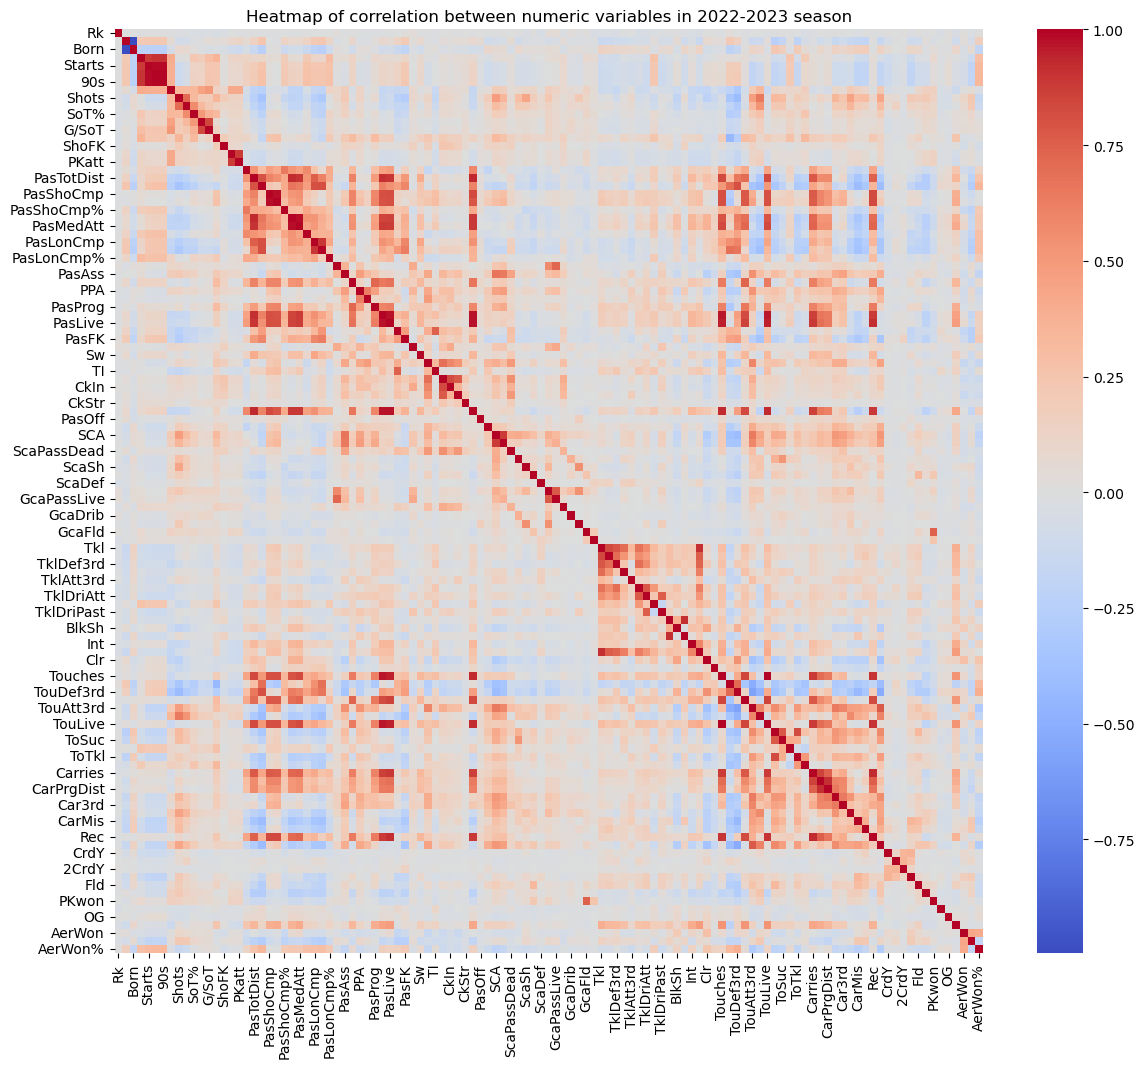

In [84]:
plt.figure(figsize = (14,12))
heat_map = sns.heatmap(numeric_columns_2023.corr(),cmap = 'coolwarm')

plt.title('Heatmap of correlation between numeric variables in 2022-2023 season')

fig = heat_map.get_figure()
fig.savefig("heatmap.png")

Although this heatmap is quite complex considering the number of variables, it actually tells a lot of interesting points. As the player statistics are generally organized in similiar groups, i.e. touches is before touches in final third, which is before touches in defensive third, most of the points close to the diagonal line is likely to be highly correlated. 

This is shown to be true by the number of red blocks around the the diagonal line.

However, we can observe many blue patches in the heatmap, alluding to a negative correlation. Whilst some of the variables may directly be negatively correlated with each other by design, many of the blue patches do not seem related. This may come from different positions requiring different skills, almost specialist like. This may mean being superior in one skillset can lead to a deteriment of another skill set.

In [85]:
numeric_columns_2022 = player_stats2022.select_dtypes(include = 'number')
categorical_columns_2022 = player_stats2022.select_dtypes(include = 'object')

Text(0.5, 1.0, 'Heatmap of correlation between numeric variables in 2021-2022 season')

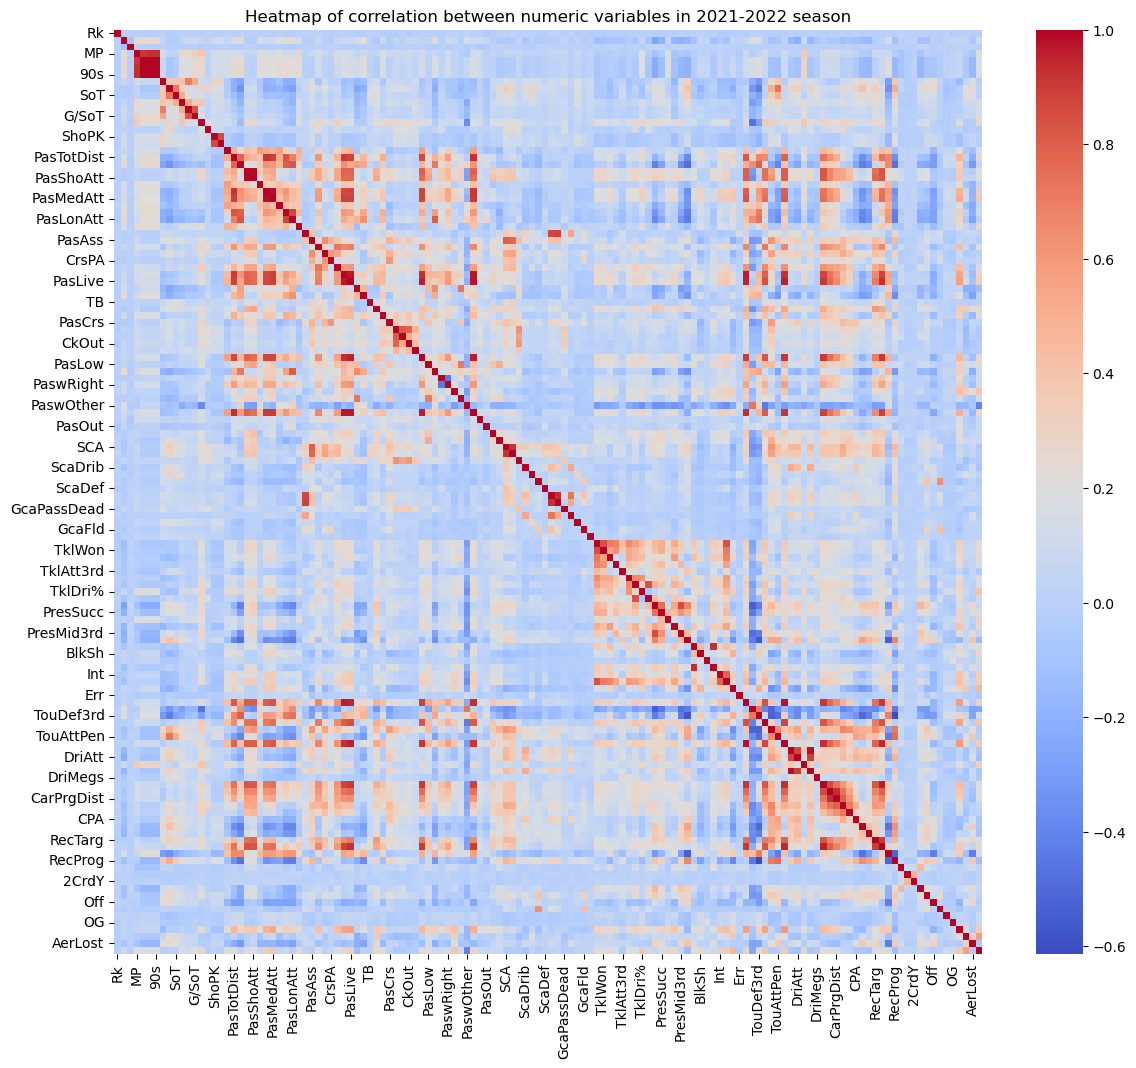

In [86]:
plt.figure(figsize = (14,12))
sns.heatmap(numeric_columns_2022.corr(),cmap = 'coolwarm')

plt.title('Heatmap of correlation between numeric variables in 2021-2022 season')

The heatmap for the 2021 - 2022 season is very similiar to the heatmap for the 2022 - 2023 season. This is promising as there is likely a similiar pattern for each year. Large fluctuations between the two years will make the model less effective as it would be more difficult to weight each variable. 

### Visualizing the target variable.

Note that this below graph is not a fair representation of the target variable as this is looking at the dataset which has many more players than the top 5 leagues. However, our player statistics (and our whole analysis) is based on players in the top 5 leagues. Many of the players outside of the top 5 leagues will have much lower valuation, hence skewing the distribution to the right.

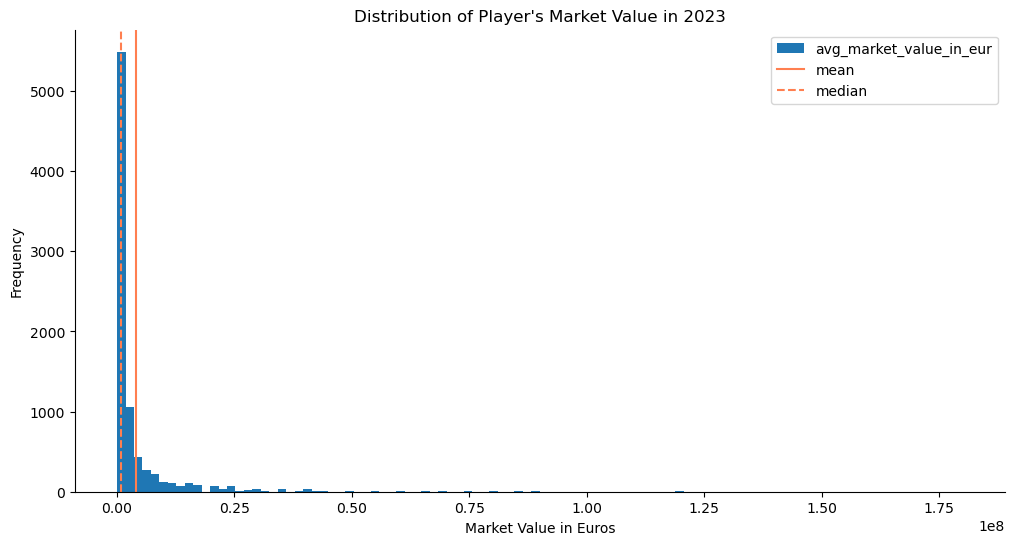

In [72]:
dist = merged_2023['avg_market_value_in_eur'].plot(kind = "hist",bins = 100, figsize = (12,6))
sns.despine()
plt.axvline(merged_2023['avg_market_value_in_eur'].mean(), c = "coral", label = "mean")
plt.axvline(merged_2023['avg_market_value_in_eur'].median(), c = "coral", label = "median", linestyle = "--")
plt.xlabel('Market Value in Euros')
plt.ylabel('Frequency')
plt.legend()
plt.title("Distribution of Player's Market Value in 2023")

dist_fig = dist.get_figure()
dist_fig.savefig("DistributionMarketValue.png")

In [73]:
print(merged_2023['avg_market_value_in_eur'].mean())
print(merged_2023['avg_market_value_in_eur'].median())
print(merged_2023['avg_market_value_in_eur'].max())

4032582.5102146063
800000.0
180000000.0


Most of the player's value is within 5 million Euros, with the mean at around 403,000 Euros and the median at 800,000, and the max at 180 million. This shows that the distribution is very highly skewed to the right. However, as noted above, this is further exaggerated by the presence  of market values of players outside the top 5 leagues.

### Next steps in cleaning

Next steps would be merge the `merged_2023` table with the `player_stats2023` table and to merge the `merged_2022` table with the `player_stats2022`. The data still need to be fully cleaned, including appending the `first_name` and `last_name` together in the `merged_2023/2022` datasets.

Additionally, there seems to be some naming errors in the `player_stats2022` and `player_stats2023` tables.

Lastly, the additional columns in the player stats datasets will have to be dealt with. Most likely the unique columns will be removed.

In [81]:
# Some names are not properly displaying - may need to manually fix these names
player_stats2023[player_stats2023['Player'].str.contains('\?')]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
95,96,Komnen Andri?,SRB,FW,Clermont Foot,Ligue 1,27,1995,23,15,...,1.01,2.59,0.43,0.07,0.0,0.0,2.52,2.95,3.38,46.6
120,121,Marko Arnautovi?,AUT,FW,Bologna,Serie A,33,1989,14,14,...,1.36,0.98,0.76,0.00,0.0,0.0,2.05,0.53,0.76,41.2
158,159,Sr?an Babi?,SRB,DF,Almería,La Liga,26,1996,18,17,...,0.80,0.11,0.00,0.00,0.0,0.0,4.29,1.71,1.14,60.0
209,210,Toma Baši?,CRO,MF,Lazio,Serie A,26,1996,14,4,...,1.95,2.20,0.00,0.00,0.0,0.0,4.88,1.95,1.46,57.1
232,233,Asmir Begovi?,BIH,GK,Everton,Premier League,35,1987,1,1,...,0.00,0.00,0.00,0.00,0.0,0.0,0.00,1.00,0.00,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2671,2672,Piotr Zieli?ski,POL,MF,Napoli,Serie A,28,1994,21,16,...,0.55,1.23,0.14,0.00,0.0,0.0,4.04,0.14,0.55,20.0
2684,2685,Szymon ?urkowski,POL,MF,Fiorentina,Serie A,25,1997,2,0,...,2.50,0.00,0.00,0.00,0.0,0.0,5.00,2.50,2.50,50.0
2685,2686,Szymon ?urkowski,POL,MF,Spezia,Serie A,25,1997,1,0,...,0.00,0.00,0.00,0.00,0.0,0.0,30.00,0.00,0.00,0.0
2687,2688,Milan ?uri?,BIH,FW,Hellas Verona,Serie A,32,1990,16,7,...,1.92,1.79,0.38,0.00,0.0,0.0,2.05,14.50,3.59,80.1
